<a href="https://colab.research.google.com/github/BraihanBenjaminGonzalezG/EDA_FundamentosML_BraihanGonzalez/blob/main/EDA_E_Commerce_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

In [9]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=",", encoding='latin1')
df.head(10)

Saving data.csv to data (1).csv


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


1) Identificación y descripción de las variables (categóricas y numéricas).

Categoricas: son como etiquetas o nombres.
Numerica: son cosas que se pueden contar o medir.

Este paso nos ayuda a enteder que tipo de datos hay en el excel: si son numericos, codigos, fechas, nombres, entre otros. Es util para saber como analizar los mismos despues.


In [13]:
df = pd.read_csv("data.csv", encoding='latin1')

# Clasificar variables
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
numerical_vars = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Ver variables únicas y ejemplos
variable_summary = pd.DataFrame({
    "Tipo": ["Categórica" if col in categorical_vars else "Numérica" for col in df.columns],
    "Cantidad de valores únicos": [df[col].nunique() for col in df.columns],
    "Ejemplo de valor": [df[col].dropna().unique()[0] for col in df.columns]
})

# Mostrar tabla resumen
print("Resumen de variables:")
display(variable_summary)

Resumen de variables:


,Tipo,Cantidad de valores únicos,Ejemplo de valor
0,Categórica,25900,536365
1,Categórica,4070,85123A
2,Categórica,4223,WHITE HANGING HEART T-LIGHT HOLDER
3,Numérica,722,6
4,Categórica,23260,12/1/2010 8:26
5,Numérica,1630,2.55
6,Numérica,4372,17850.0
7,Categórica,38,United Kingdom


2)Medidas de tendencia central y dispersion

Aqui nos dice como se comportan los valores numericos. Por ejemplo:

-Promedio(La media): Valor tipico.

-Mediana: Es el valor que esta justo en el medio si ordenamos los datos.

-Desviacion estandar: Es cuanto se alejan los valores del promedio.

-Min y Max: Son los valores mas extremos.

In [14]:
# Medidas de tendencia central y dispersión para las variables numéricas
print("Medidas estadísticas para variables numéricas:")
df.describe()


Medidas estadísticas para variables numéricas:


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Aqui se puede ver:

count: cuántos datos hay

mean: promedio

std: desviación estándar

min y max: valor mínimo y máximo

25%, 50%, 75%: cuartiles (nos dicen cómo están distribuidos los datos)

3) Analisis de distribucion

Este Analisis nos dice como se reparten los valores de una variable.

Si la mayoria de los valores estan cerca del promedio, la distribucion es simetrica(pareja)

Si hay muchos valores muy altos o muy bajos que desordenan la curva, hay sesgo:

-Sesgo ala derecha(positiva): mas valores pequeños y unos pocos muy grandes.

-Sesgo a la izquierda(negativa): mas valores grandes y unos pocos pequeños.

Esto sirve para entender si los datos estan balaceados o desbalanceados.

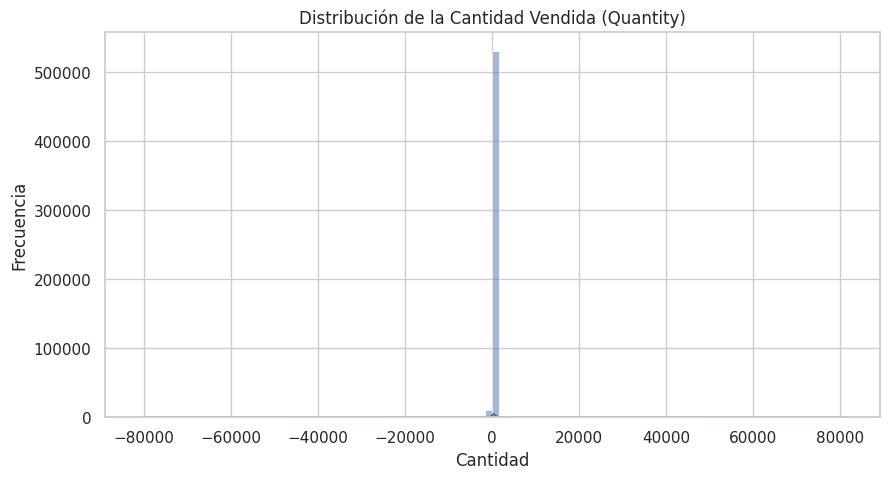

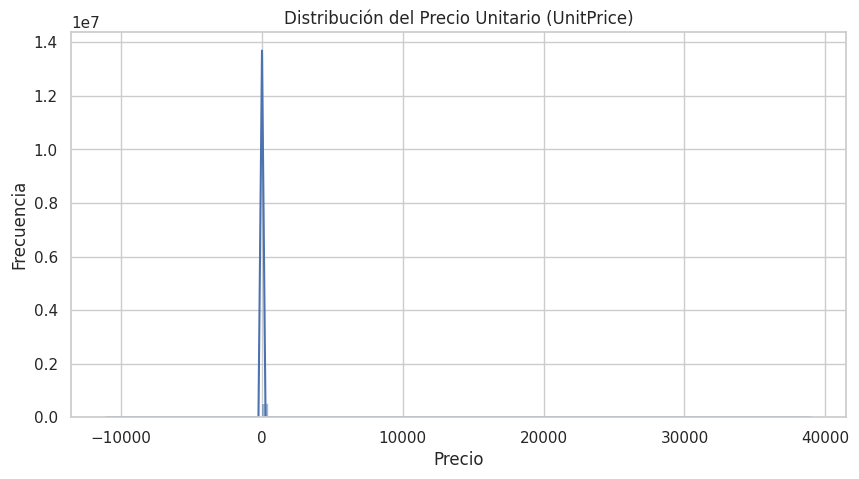

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# Configuración de gráficos
sns.set(style="whitegrid")

# Histograma para analizar distribución de 'Quantity'
plt.figure(figsize=(10, 5))
sns.histplot(df['Quantity'], bins=100, kde=True)
plt.title("Distribución de la Cantidad Vendida (Quantity)")
plt.xlabel("Cantidad")
plt.ylabel("Frecuencia")
plt.show()

# Histograma para 'UnitPrice'
plt.figure(figsize=(10, 5))
sns.histplot(df['UnitPrice'], bins=100, kde=True)
plt.title("Distribución del Precio Unitario (UnitPrice)")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

4) Visualizando graficas

Las graficas te ayudaran a ver los datos de forma clara y detectar cosas importantes como: distribucion, valores atipicos y comparaciones.

4.1)Boxplot para detectar valores atípicos.

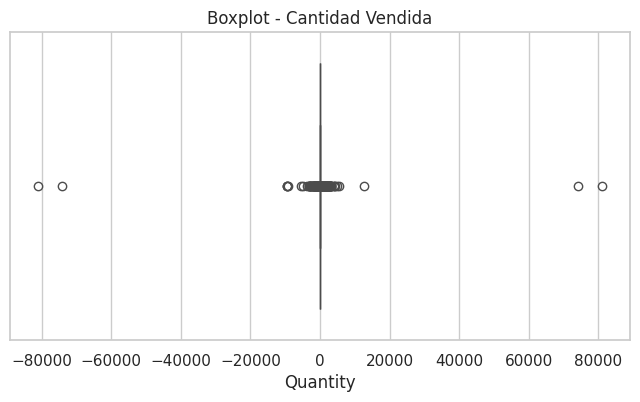

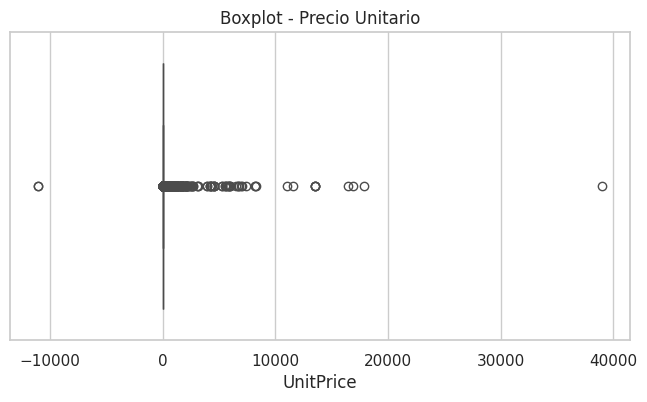

In [17]:
# Boxplot de Quantity
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Quantity'])
plt.title("Boxplot - Cantidad Vendida")
plt.show()

# Boxplot de UnitPrice
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['UnitPrice'])
plt.title("Boxplot - Precio Unitario")
plt.show()


4.2) Tabla de frecuencia de los países con más compras

Países con más transacciones:
Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: count, dtype: int64


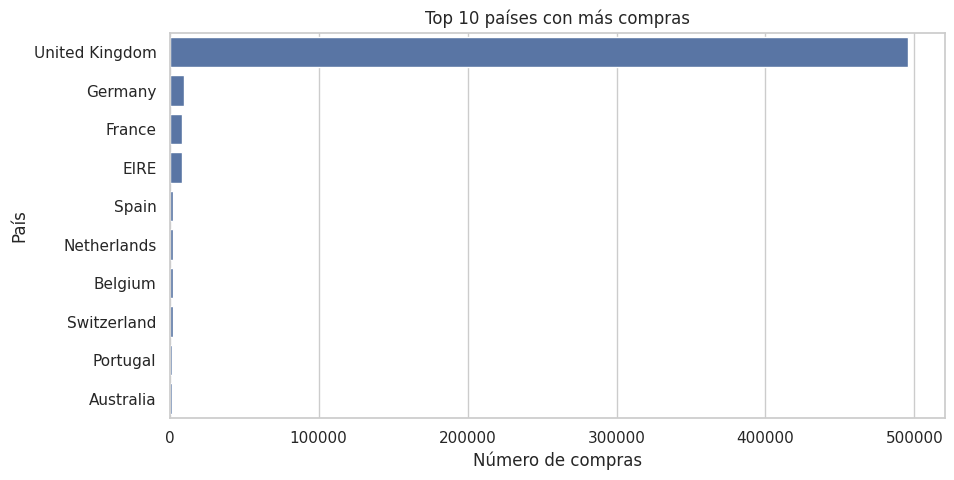

In [18]:
# Top 10 países por cantidad de compras
country_counts = df['Country'].value_counts().head(10)
print("Países con más transacciones:")
print(country_counts)

# Gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title("Top 10 países con más compras")
plt.xlabel("Número de compras")
plt.ylabel("País")
plt.show()


4.3) Productos más vendidos (por cantidad)

Top 10 productos más vendidos:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64


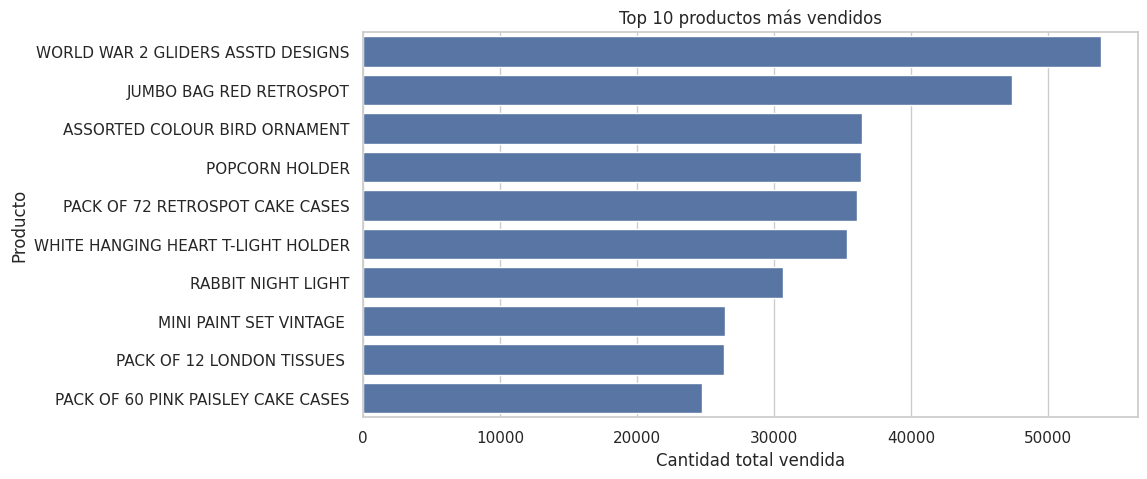

In [19]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 productos más vendidos:")
print(top_products)

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 productos más vendidos")
plt.xlabel("Cantidad total vendida")
plt.ylabel("Producto")
plt.show()


5) Identificacion de valores atipicos.

Los valores atípicos son datos que se salen mucho de lo normal, como:

Un producto con una cantidad muy exagerada (ej: 1000 unidades).

Precios fuera de lo común (ej: 0 o más de 1000).

Estos valores pueden ser errores, casos especiales, o cosas que conviene revisar por separado.


Como detectarlos?

Bueno una forma es usar los boxplots y otra forma ews usar reglas como:

-Valores fuera del rango: menor que Q1 - 1.5*IQR o mayor que Q3 + 1.5*IQR

5.1)Detectar outliers en Quantity

In [20]:
# Cálculo de IQR para Quantity
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar outliers
outliers_quantity = df[(df['Quantity'] < Q1 - 1.5 * IQR) | (df['Quantity'] > Q3 + 1.5 * IQR)]
print(f"Cantidad de outliers en 'Quantity': {outliers_quantity.shape[0]}")


Cantidad de outliers en 'Quantity': 58619


5.2)  Detectar outliers en UnitPrice

In [21]:
# Cálculo de IQR para UnitPrice
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar outliers
outliers_price = df[(df['UnitPrice'] < Q1 - 1.5 * IQR) | (df['UnitPrice'] > Q3 + 1.5 * IQR)]
print(f"Cantidad de outliers en 'UnitPrice': {outliers_price.shape[0]}")


Cantidad de outliers en 'UnitPrice': 39627


Empecemos con el desafio extra.


1) Ticket promedio por transaccion.

Mide cuánto gasta, en promedio un cliente por compra.
Sirve para saber si los clientes compran poco o mucho.


In [22]:
# Crear columna de total por línea
df['Total'] = df['Quantity'] * df['UnitPrice']

# Ticket promedio por número de factura
ticket_promedio = df.groupby('InvoiceNo')['Total'].sum().mean()
print(f"Ticket promedio por compra: £{ticket_promedio:.2f}")


Ticket promedio por compra: £376.36


2) Prodcutos mas vendidos, por cantidad y ingresos.

Te dice qué productos se venden más (por cantidad) y cuáles generan más ingresos.

In [23]:
# Por cantidad
top_cantidad = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 productos más vendidos (cantidad):")
print(top_cantidad)

# Por ingresos
top_ingresos = df.groupby('Description')['Total'].sum().sort_values(ascending=False).head(10)
print("Top 10 productos más vendidos (por ingresos):")
print(top_ingresos)


Top 10 productos más vendidos (cantidad):
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64
Top 10 productos más vendidos (por ingresos):
Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT      

3) Comparación de países ventas totales.

Compara qué como venden cada pais.

Top 10 países por ingresos:
Country
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Australia          137077.270
Switzerland         56385.350
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: Total, dtype: float64


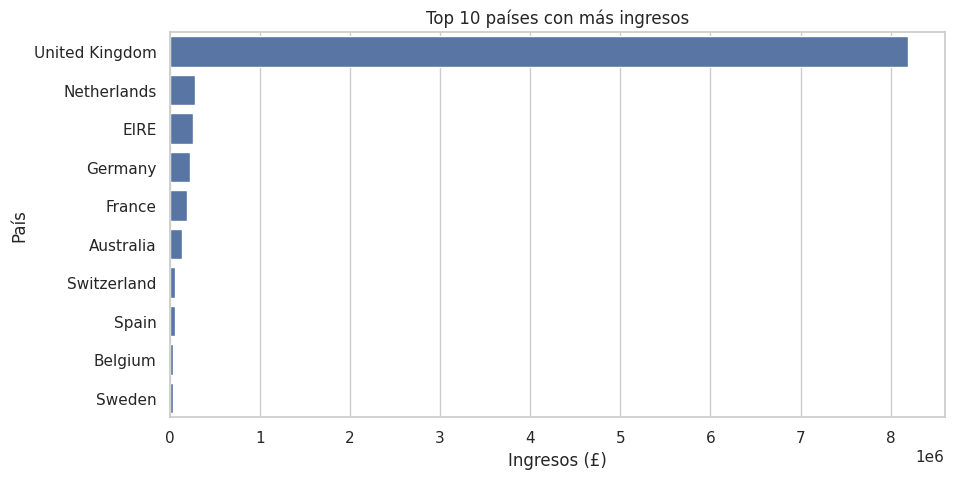

In [24]:
ventas_por_pais = df.groupby('Country')['Total'].sum().sort_values(ascending=False).head(10)
print("Top 10 países por ingresos:")
print(ventas_por_pais)

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=ventas_por_pais.values, y=ventas_por_pais.index)
plt.title("Top 10 países con más ingresos")
plt.xlabel("Ingresos (£)")
plt.ylabel("País")
plt.show()


4)Comportamiento temporal de las compras

Te ayuda a ver si hay días o meses donde la gente compra más, sirve para planificar promociones, stock, etc.

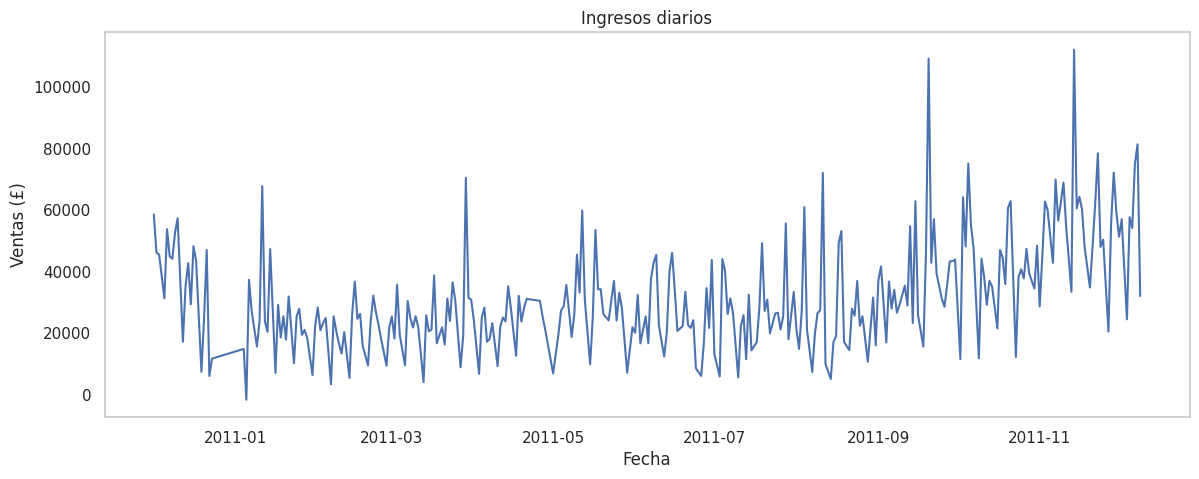

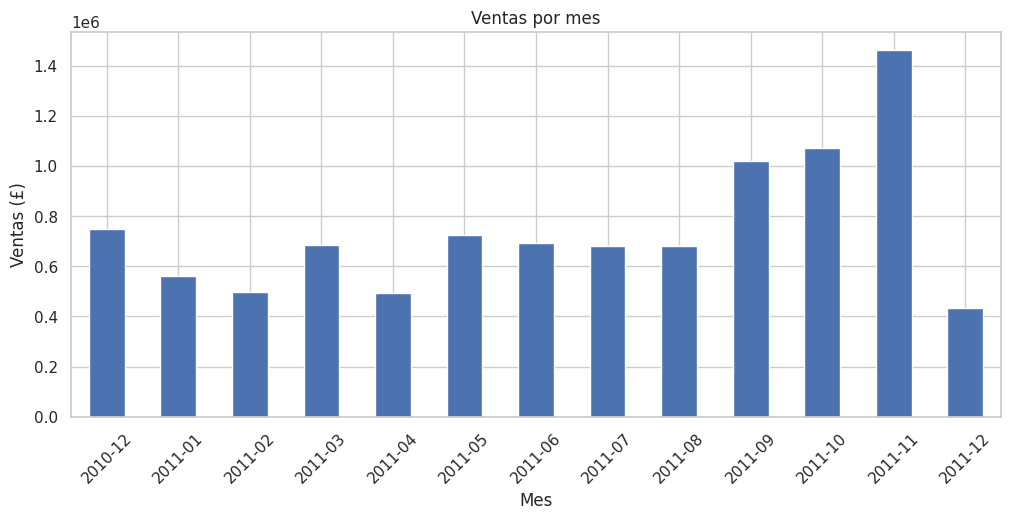

In [25]:
# Convertir fecha
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Crear columnas de fecha
df['Fecha'] = df['InvoiceDate'].dt.date
df['Mes'] = df['InvoiceDate'].dt.to_period('M')

# Ventas por día
ventas_diarias = df.groupby('Fecha')['Total'].sum()

# Gráfico
plt.figure(figsize=(14, 5))
ventas_diarias.plot()
plt.title("Ingresos diarios")
plt.xlabel("Fecha")
plt.ylabel("Ventas (£)")
plt.grid()
plt.show()

# Ventas por mes
ventas_mensuales = df.groupby('Mes')['Total'].sum()
plt.figure(figsize=(12, 5))
ventas_mensuales.plot(kind='bar')
plt.title("Ventas por mes")
plt.ylabel("Ventas (£)")
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.show()
